# **20BCE1205**
# **Shubham Ojha**
# **ML-CSE4020**
# **Lab - 8**

# **K-Medoid Clustering**

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [ ]:
from sklearn import datasets
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [ ]:
x.shape


(150, 4)

**With Library**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters=3, random_state=0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [ ]:
y_kmed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters=3, random_state=0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
silhouette_avg

0.4590416105554613

In [ ]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
  ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
  print(np.mean(ith_cluster_silhouette_values))

0.636330614585637
0.3768888598233938
0.36213487963471125


In [ ]:
sw = []
for i in range(2,11):
  kMedoids = KMedoids(n_clusters = i, random_state = 0)
  kMedoids.fit(x_scaled)
  y_kmed = kMedoids.fit_predict(x_scaled)
  silhouette_avg = silhouette_score(x_scaled, y_kmed)
  sw.append(silhouette_avg)

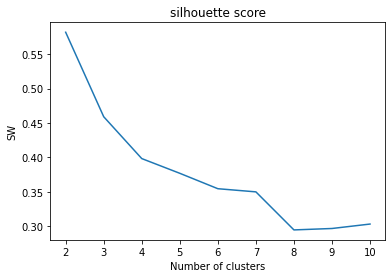

In [ ]:
plt.plot(range(2,11), sw)
plt.title('silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')
plt.show()

In [ ]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

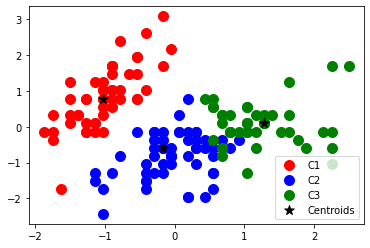

In [ ]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0,1], s = 100, c='red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1,1], s = 100, c='blue', label = 'C2')
plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2,1], s = 100, c='green', label = 'C3')
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], s=100, c='black',marker='*',label = 'Centroids')
plt.legend()

In [ ]:
from sklearn_extra.cluster import KMedoids
model1 = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
print('Centers found by scikit-learn extra:')
print(model1.cluster_centers_)

Centers found by scikit-learn extra:
[[-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-0.17367395 -0.59237301  0.42173371  0.13250973]
 [ 1.2803405   0.09821729  0.93327055  1.18556721]]


**Without Library**

In [ ]:
def euclideanDistance(x, y):
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

In [ ]:
class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        self.medoids = []
        
        #Starting medoids will be random members from data set X
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        
        for i in range(0,self.k):
            self.medoids_cost.append(0)
        
    def isConverged(self, new_medoids):
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])
        
    def updateMedoids(self, X, labels):
        self.has_converged = True
        
        #Store data points to the current cluster they belong to
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        
        #Calculate the new medoids
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                #Cost of the current data points to be compared with the current optimal cost
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                #If current cost is less than current optimal cost,
                #make the current data point new medoid of the cluster
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            #Now we have the optimal medoid of the current cluster
            new_medoids.append(new_medoid)
        
        #If not converged yet, accept the new medoids
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
    
    def fit(self, X):
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            #Labels for this iteration
            cur_labels = []
            for medoid in range(0,self.k):
                #Dissimilarity cost of the current cluster
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    #Distances from a data point to each of the medoids
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    #Data points' label is the medoid which has minimal distance to it
                    cur_labels.append(d_list.index(min(d_list)))
                    
                    self.medoids_cost[medoid] += min(d_list)
                                
            self.updateMedoids(X, cur_labels)
            
            if self.has_converged:
                break

        return np.array(self.medoids)

        
    def predict(self,data):
        pred = []
        for i in range(len(data)):
            #Distances from a data point to each of the medoids
            d_list = []
            for j in range(len(self.medoids)):
                d_list.append(euclideanDistance(self.medoids[j],data[i]))
                
            pred.append(d_list.index(min(d_list)))
            
        return np.array(pred)

Text(0, 0.5, 'Petal Width')

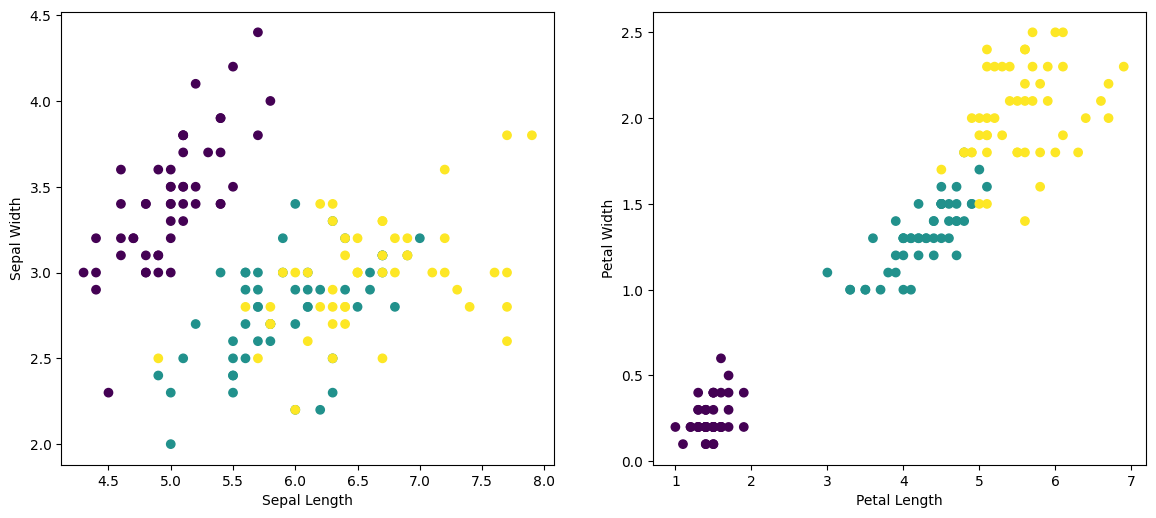

In [ ]:
X = []
X = myiris.data
y = myiris.target
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].scatter(X[:,2], X[:,3], c=y)
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')

In [ ]:
D=X[:,2:]
cluster_num=3
model = k_medoids(k=cluster_num)
centers = model.fit(D)
print(centers)

[[1.6 0.2]
 [5.  1.7]
 [1.4 0.2]]


Text(0.5, 1.0, 'Predicted')

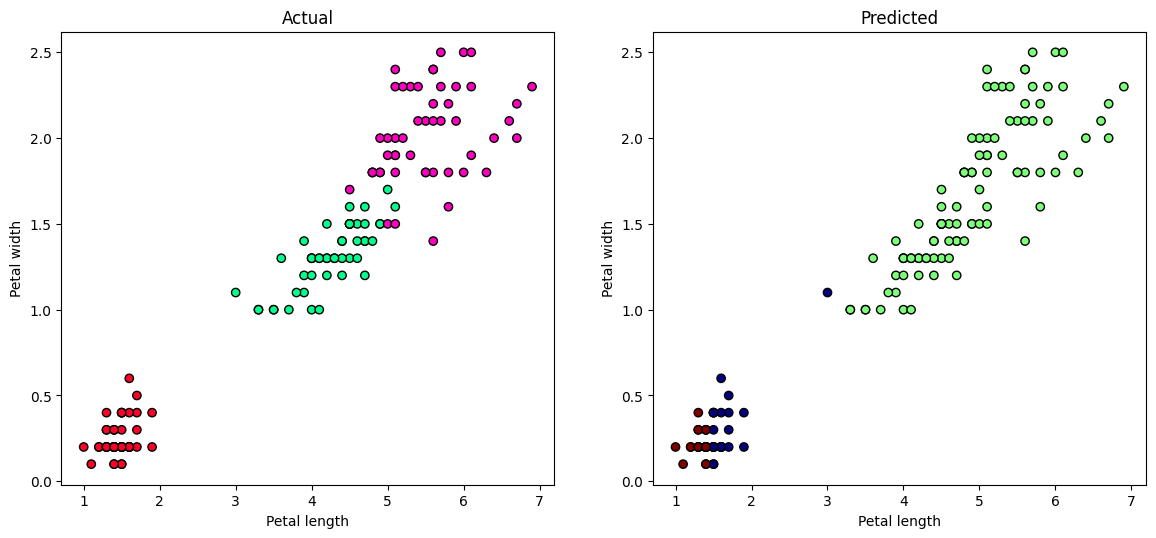

In [ ]:
new_labels = model.predict(D)
#Plot the identified clusters and compare with our result
fig, axes = plt.subplots(1, 2, figsize=(14,6),dpi=100)
axes[0].scatter(D[:, 0], D[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k')
axes[1].scatter(D[:, 0], D[:, 1], c=new_labels, cmap='jet',
edgecolor='k')
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

In [ ]:
diff = 0
for i in range(0, cluster_num):
    count_y = 0
    count_labels = 0
    for j in range(len(y)):
        if y[j] == i:
            count_y += 1
        if new_labels[j] == i:
            count_labels += 1
    diff += abs(count_y - count_labels)

print("Diff = ",diff)
print("Precision of prediction = ",((len(y) - diff)/len(y))*100)

Diff =  98
Precision of prediction =  34.66666666666667


# **KNN CLUSTERING**

In [ ]:
import numpy as np
import matplotlib.pyplot as ply
import pandas as pd
from collections import Counter

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [ ]:
 dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

[[ 5  0  0]
 [ 0 13  1]
 [ 0  0 11]]


 **Without Using Libraries**

In [ ]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1) #its a tuple - first item is the one with max frequency and 2nd item is its count
    return most_common[0][0]



In [ ]:
clf = KNN(k=3)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
accuracy = np.sum(predictions == y_test) / len(y_test)
print(accuracy)

0.9666666666666667


# **KMEANS CLUSTERING**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

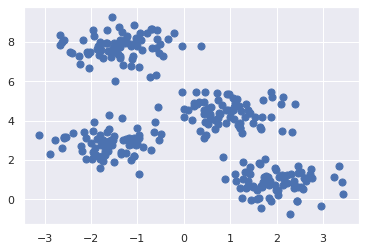

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

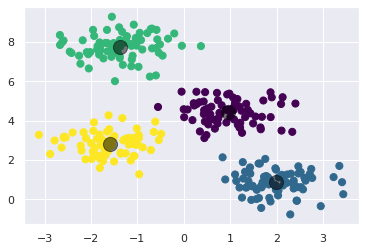

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Without Library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
# Use matplotlib in notebook output
%matplotlib inline

In [ ]:
X = [[100,5], [90,5], [110,5], [97,4], [102,4], [112,4], [92,4], [95,3], [90,3], [100,3],
     [110,5], [100,5], [110,4], [93,3], [107,2], [117,3], [96,2], [105,3], [100,3], [110,3],
     [60,-1], [70,-1],[40,1], [70,-3], [50,-1], [80,0],[50,0],[60,-1],[60,1],[55,0],
     [40,-1], [45,-1],[40,0], [55,-3], [60,-1], [65,0],[70,0],[51,-2],[51,1],[48,0]]

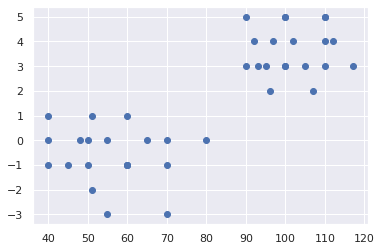

In [ ]:
plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx,ploty, 'bo')

In [ ]:
def random_centers(dim,k):
    centers = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.randint(0,100)
            center.append(rand)
        centers.append(center)
    return centers

def point_clustering(data, centers, dims, first_cluster=False):
    for point in data:
        nearest_center = 0
        nearest_center_dist = None
        for i in range(0, len(centers)):
            euclidean_dist = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean_dist += dist
            euclidean_dist = np.sqrt(euclidean_dist)
            if nearest_center_dist == None:
                nearest_center_dist = euclidean_dist
                nearest_center = i
            elif nearest_center_dist > euclidean_dist:
                nearest_center_dist = euclidean_dist
                nearest_center = i
        if first_cluster:
            point.append(nearest_center)
        else:
            point[-1] = nearest_center
    return data

def mean_center(data, centers, dims):
    print('centers:', centers, 'dims:', dims)
    new_centers = []
    for i in range(len(centers)):
        new_center = []
        n_of_points = 0
        total_of_points = []
        for point in data:
            if point[-1] == i:
                n_of_points += 1
                for dim in range(0,dims):
                    if dim < len(total_of_points):
                        total_of_points[dim] += point[dim]
                    else:
                        total_of_points.append(point[dim])
        if len(total_of_points) != 0:
            for dim in range(0,dims):
                print(total_of_points, dim)
                new_center.append(total_of_points[dim]/n_of_points)
            new_centers.append(new_center)
        else: 
            new_centers.append(centers[i])
        
            
    return new_centers

In [ ]:
def train_k_means_clustering(data, k=2, epochs=5):
    dims = len(data[0])
    print('data[0]:',data[0])
    centers = random_centers(dims,k)
    
    clustered_data = point_clustering(data, centers, dims, first_cluster=True)

    for i in range(epochs):
        centers = mean_center(clustered_data, centers, dims)
        clustered_data = point_clustering(data, centers, dims, first_cluster=False)
    
    return centers

def predict_k_means_clustering(point, centers):
    dims = len(point)
    center_dims = len(centers[0])
    
    if dims != center_dims:
        raise ValueError('Point given for prediction have', dims, 'dimensions but centers have', center_dims, 'dimensions')

    nearest_center = None
    nearest_dist = None
    
    for i in range(len(centers)):
        euclidean_dist = 0
        for dim in range(1, dims):
            dist = point[dim] - centers[i][dim]
            euclidean_dist += dist**2
        euclidean_dist = np.sqrt(euclidean_dist)
        if nearest_dist == None:
            nearest_dist = euclidean_dist
            nearest_center = i
        elif nearest_dist > euclidean_dist:
            nearest_dist = euclidean_dist
            nearest_center = i
        print('center:',i, 'dist:',euclidean_dist)
            
    return nearest_center

In [ ]:
centers = train_k_means_clustering(X, k=2, epochs=5)

data[0]: [100, 5]
centers: [[45, 27], [75, 7]] dims: 2
[313, -2] 0
[313, -2] 1
[2843, 63] 0
[2843, 63] 1
centers: [[44.714285714285715, -0.2857142857142857], [86.15151515151516, 1.9090909090909092]] dims: 2
[830, -8] 0
[830, -8] 1
[2326, 69] 0
[2326, 69] 1
centers: [[51.875, -0.5], [96.91666666666667, 2.875]] dims: 2
[1040, -12] 0
[1040, -12] 1
[2116, 73] 0
[2116, 73] 1
centers: [[54.73684210526316, -0.631578947368421], [100.76190476190476, 3.4761904761904763]] dims: 2
[1040, -12] 0
[1040, -12] 1
[2116, 73] 0
[2116, 73] 1
centers: [[54.73684210526316, -0.631578947368421], [100.76190476190476, 3.4761904761904763]] dims: 2
[1040, -12] 0
[1040, -12] 1
[2116, 73] 0
[2116, 73] 1


In [ ]:
print(centers)

[[54.73684210526316, -0.631578947368421], [100.76190476190476, 3.4761904761904763]]


center: 0 dist: 3.6315789473684212
center: 1 dist: 0.4761904761904763
1


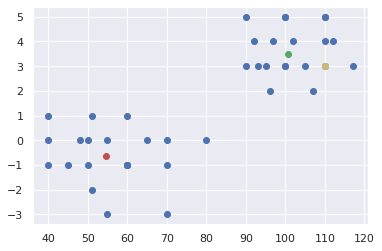

In [ ]:
point = [110,3]
print(predict_k_means_clustering(point, centers))

plt.plot(plotx,ploty, 'bo', centers[0][0], centers[0][1],'ro', centers[1][0], centers[1][1], 'go', point[0], point[1], 'yo')
